# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background
Seperti yang kita ketahui bersama, pandemi Covid-19 berdampak parah pada beberapa perusahaan dan banyak karyawan yang di-PHK.

Selain cepatnya perubahan akibat pandemi, juga terjadi perubahan kebiasaan masyarakat dalam berinvestasi. Masa pandemi yang notabene membuat pendapatan menurun, namun membuat orang berbondong-bondong mencoba berinvestasi di aset kripto atau mata uang kripto.

Cryptocurrency adalah mata uang sebagai media pertukaran digital. Mata uang ini menggunakan teknologi blockchain sehingga sulit untuk dibajak. Blockchain sendiri merupakan database yang tersebar luas di internet. Setiap transaksi yang tercatat dapat dilihat oleh semua pengguna internet.

Dalam proyek ini, kami akan mencoba memvisualisasikan pergerakan volume penjualan salah satu jenis cryptocurrency yaitu Ethereum dengan periode Jan 2020 - Jun 2021 yang datanya diambil dengan cara melakukan scraping website coingecko menggunakan library BeautifulSoup pada python.

======

As we all know, the Covid-19 pandemic has had a severe impact on several companies and many employees have been laid off.

Apart from the rapid changes caused by the pandemic, there has also been a change in people's habits about investing. The pandemic period which incidentally makes income decline, but makes people flock to try to invest in crypto assets or cryptocurrencies.

Cryptocurrency is currency as a medium of digital exchange. This currency uses blockchain technology so it is difficult to hijack. Blockchain itself is a widely distributed database on the internet. Every recorded transaction can be seen by all internet users.

In this project, we will try to visualize the movement of the sales volume of one type of cryptocurrency called Ethereum with the period from Jan 2020 - Jun 2021 whose data is taken by scraping the coingecko website using the BeautifulSoup library in python.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.
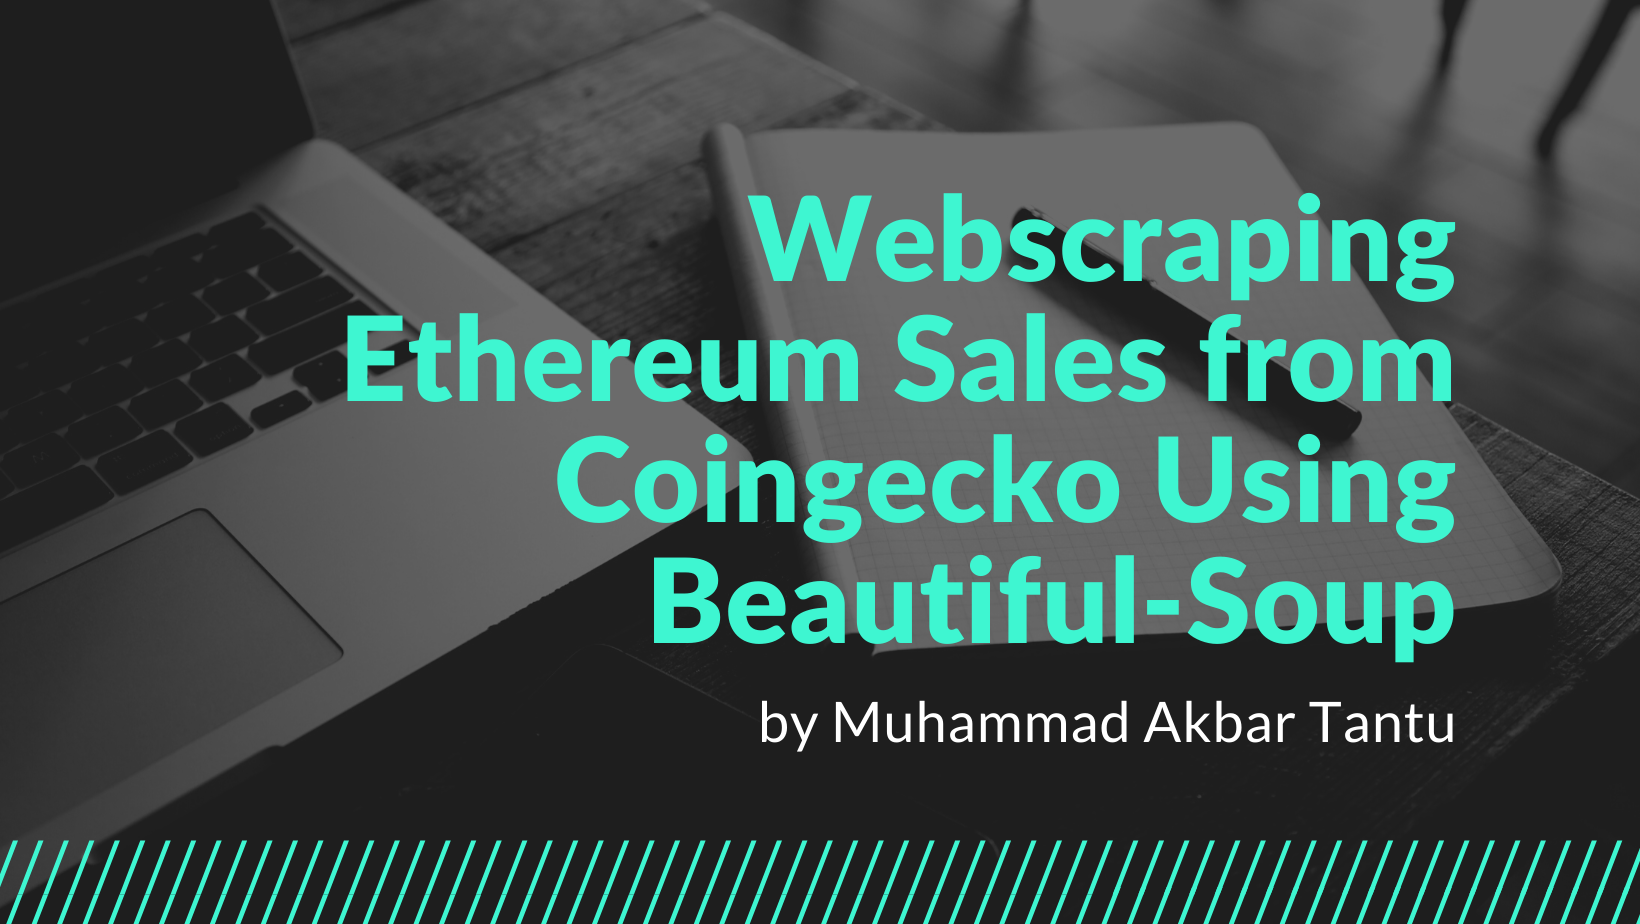

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n<link rel="preload" href="h'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

#Menggunakan method prettify untuk memperbaiki tampilan HTML dan hanya menampilkan 500 karakter
print(soup.prettify()[1:500])

!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
  


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [17]:
table = soup.find('table', attrs={'class':"table table-striped text-sm text-lg-normal"})
print(table.prettify()[1:1000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-cente


Finding row length.

In [12]:
#Mengecek isi dari tag th dengan class font-semibold text-center
table.find_all('th', attrs={'class':"font-semibold text-center"})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [16]:
row = table.find_all('th', attrs={'class':"font-semibold text-center"})
row_length = len(row)
row_length

547

In [31]:
table.find_all('th', attrs={'class':"font-semibold text-center"})[546]

<th class="font-semibold text-center" scope="row">2020-01-01</th>

In [20]:
table.find_all('td', attrs={'class':"text-center"})[:5]

[<td class="text-center">
 $253,607,549,372
 </td>, <td class="text-center">
 $27,149,143,847
 </td>, <td class="text-center">
 $2,169.40
 </td>, <td class="text-center">
 N/A
 </td>, <td class="text-center">
 $243,040,539,437
 </td>]

Pada bagian ini, kita akan melakukan web scraping untuk mengambil data market cap, volume, harga open dan harga close dari Ethereum dengan menggunakan looping

In [47]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process
    
    #get date
    Periode = table.find_all('th', attrs={'class':"font-semibold text-center"})[i].text
    
    #get market cap
    Market_cap = table.find_all('td', attrs={'class':"text-center"})[i+(3*i)].text
    Market_cap = Market_cap.strip() #Menghilangkan kelebihan spasi dan enter
    
    #get volume
    Volume = table.find_all('td', attrs={'class':"text-center"})[i+1+(3*i)].text
    Volume = Volume.strip()
    
    #get open
    Open = table.find_all('td', attrs={'class':"text-center"})[i+2+(3*i)].text
    Open = Open.strip()
    
    #get close
    Close = table.find_all('td', attrs={'class':"text-center"})[i+3+(3*i)].text
    Close = Close.strip()
    
    temp.append((Periode, Market_cap, Volume, Open, Close))

In [48]:
temp = temp[::-1]
temp[:10]

[('2020-01-01', '$14,097,451,632', '$7,103,187,151', '$129.19', '$130.48'),
 ('2020-01-02', '$14,230,588,104', '$6,623,732,041', '$130.48', '$127.05'),
 ('2020-01-03', '$13,859,793,330', '$6,497,297,884', '$127.05', '$133.70'),
 ('2020-01-04', '$14,613,194,776', '$9,655,245,100', '$133.70', '$134.14'),
 ('2020-01-05', '$14,636,213,160', '$6,958,393,690', '$134.14', '$135.01'),
 ('2020-01-06', '$14,738,834,254', '$7,260,645,128', '$135.01', '$143.81'),
 ('2020-01-07', '$15,692,578,635', '$9,514,201,882', '$143.81', '$143.02'),
 ('2020-01-08', '$15,656,491,188', '$9,440,938,788', '$143.02', '$140.27'),
 ('2020-01-09', '$15,364,547,562', '$10,095,847,759', '$140.27', '$137.86'),
 ('2020-01-10', '$14,998,595,868', '$7,280,640,218', '$137.86', '$144.60')]

## Creating data frame & Data wrangling

Setelah dilakukan scraping, maka hasil scrap tersebut akan disimpan dalam sebuat dataframe dengan memberikan nama kolom sesuai dengan yang diinginkan

In [86]:
import pandas as pd

#Setting untuk menghilangkan format data exponential
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.DataFrame(temp, columns = ('date','market_cap','volume','open','close'))
df.head()

,date,market_cap,volume,open,close
0,2020-01-01,"$14,097,451,632","$7,103,187,151",$129.19,$130.48
1,2020-01-02,"$14,230,588,104","$6,623,732,041",$130.48,$127.05
2,2020-01-03,"$13,859,793,330","$6,497,297,884",$127.05,$133.70
3,2020-01-04,"$14,613,194,776","$9,655,245,100",$133.70,$134.14
4,2020-01-05,"$14,636,213,160","$6,958,393,690",$134.14,$135.01


In [87]:
df.dtypes

date          object
market_cap    object
volume        object
open          object
close         object
dtype: object

### Data Wrangling
1. Melakukan perapihan penulisan pada setiap kolom seperti:
    * Menghilangkan dollar sign "$"
    * Menghilangkan tanda koma ","
2. Melakukan konversi tipe data sesuai dengan jenis kolomnya yaitu:
    * date: menjadi Datetime64
    * market_cap menjadi float
    * volume menjadi float
    * open menjadi float
    * close menjadi float

In [88]:
cols =['market_cap','volume','open','close']

#Melakukan pembersihan data dengan menghilangkan dollar sign pada kolom market_cap, volume, open dan close serta konversi menjadi float
df[cols] = df[cols].replace({'\$':''}, regex = True)
df[cols] = df[cols].replace({',':''}, regex = True)
df[cols] = df[cols].astype('float64')

#Melakukan konversi kolom date menjadi format tanggal
df['date'] = df['date'].astype('datetime64')

df.tail()

,date,market_cap,volume,open,close
541,2021-06-25,231644258719.00,22447489242.00,1990.08,1833.46
542,2021-06-26,213871849532.00,25981381067.00,1833.46,1817.05
543,2021-06-27,209989265221.00,24249510321.00,1817.05,1973.93
544,2021-06-28,229354016311.00,24316408028.00,1973.93,2087.52
545,2021-06-29,243040539437.00,30629329806.00,2087.52,2169.40


In [89]:
df.dtypes

date          datetime64[ns]
market_cap           float64
volume               float64
open                 float64
close                float64
dtype: object

In [90]:
df = df.set_index('date')

### Data Visualization

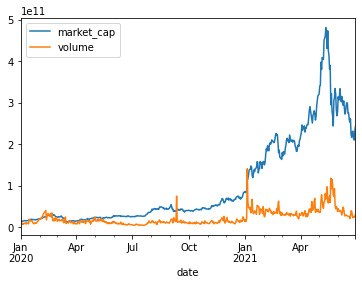

In [91]:
import matplotlib.pyplot as plt

df.plot(y=['market_cap','volume'])

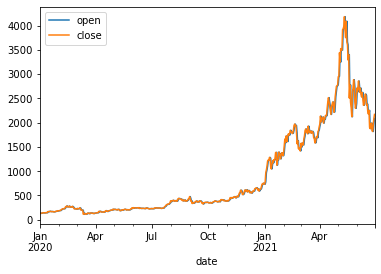

In [92]:
df.plot(y=['open','close'])

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Grafik pergerakan volume penjualan Ethereum pada semester 1 2020 tidak mengalami perubahan yang signifikan sehingga market cap di periode tersebut juga tidak mengalami peningkatan yang cukup drastis.

Namun pada akhir Q3 2020 sempat terjadi peningkatan volume penjualan namun kembali turun pada awal Q4 2020 sampai akhirnya di awal 2021 terjadi transaksi penjualan signifikan yang juga membuat nilai market cap Ethereum naik secara eksponensial hingga mencapai puncak market cap tertinggi di bulan Mei 2021 namun secara volume penjualan tidak terjadi kenaikan siginifikan jika dibandingkan awal Jan 2021.

======

The graph of the movement of Ethereum sales volume in semester 1 2020 did not experience significant changes so that the market cap during that period also did not experience a drastic increase.

However, at the end of Q3 2020 there was an increase in sales volume but it fell again at the beginning of Q4 2020 until finally in early 2021 there was a significant sales transaction which also made the market capitalization value of Ethereum increase exponentially until it reached the peak of the highest market capitalization in May 2021. sales volume did not increase significantly when compared to early January 2021.

### Extra Challenge

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.